<a href="https://colab.research.google.com/github/Samiratu/symptoms-to-disease/blob/main/heart_diabetes_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# libraries for building the neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diabetes = pd.read_csv('/content/drive/My Drive/disease-data//diabetes_data.csv')
# Sample of the dataset
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# size of dataset
diabetes.shape

(520, 17)

In [ ]:
# identify variable types
diabetes.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [ ]:
#Understand various summary statistics of the data
diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
#Get count of values in a categorical variable
diabetes['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [ ]:
diabetes['class'].unique()

array(['Positive', 'Negative'], dtype=object)

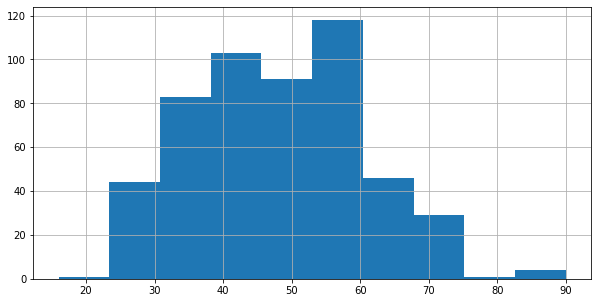

In [ ]:
diabetes.Age.hist(figsize=(10,5))

In [ ]:
 diabetes.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
# Transformation categorical to numerical
diabetes = diabetes.replace({'Gender': {'Male': 1,  'Female': 0}})
diabetes = diabetes.replace({'Polyuria': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Polydipsia': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'sudden weight loss': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'weakness': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Polyphagia': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Genital thrush': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'visual blurring': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Itching': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Irritability': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'delayed healing': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'partial paresis': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'muscle stiffness': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Alopecia': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'Obesity': {'Yes': 1,  'No': 0}})
diabetes = diabetes.replace({'class': {'Positive': 1,  'Negative': 0}})


In [ ]:
# Scaling continues age because its a continues variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diabetes[['Age']] = scaler.fit_transform(diabetes[['Age']])

In [ ]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
Ydiab = diabetes['class']
Xdiab = diabetes.drop(['class'], axis = 1)

### Function for Ploting training History

In [ ]:
def plot_training_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

Feature Importances :  [0.02468059 0.1104956  0.22259757 0.24462892 0.05272717 0.03362136
 0.0257689  0.02738756 0.03067236 0.02826071 0.05165935 0.02664803
 0.03390522 0.0117486  0.05558585 0.01961219]


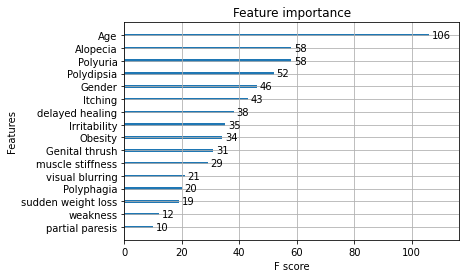

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(Xdiab, Ydiab)
print("Feature Importances : ", xgb_model.feature_importances_)
# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
print(diabetes.corr()["class"].abs().sort_values(ascending=False))

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Name: class, dtype: float64


In [ ]:
# Creating a new dataframe with the 8 most correlated features
diab_df = diabetes[['Age', 'Alopecia','Polyuria','Polydipsia', 'Gender','Itching', 'delayed healing', 'Irritability', 'class']]
diab_df.head()

,Age,Alopecia,Polyuria,Polydipsia,Gender,Itching,delayed healing,Irritability,class
0,0.324324,1,0,1,1,1,1,0,1
1,0.567568,1,0,0,1,0,0,0,1
2,0.337838,1,1,0,1,1,1,0,1
3,0.391892,0,0,0,1,1,1,0,1
4,0.594595,1,1,1,1,1,1,1,1


In [ ]:
# split data into X and Y train
Yd = diab_df[['class']]
Xd = diab_df.drop(['class'],axis=1)

In [ ]:
# Split data into train and test
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, Yd, test_size=0.2, random_state=43)

## Initial Model

In [ ]:
dmodel = Sequential()
dmodel.add(Dense(5,activation='relu',input_dim=8))
dmodel.add(Dense(1,activation='sigmoid'))
print(dmodel.summary())
dmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history1 = dmodel.fit(x=Xd_train, y = yd_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
14/14 - 1s - loss: 0.6317 - accuracy: 0.6024 - val_loss: 0.6087 - val_accuracy: 0.6071
Epoch 2/300
14/14 - 0s - loss: 0.6142 - accuracy: 0.5843 - val_loss: 0.5986 - val_accuracy: 0.5714
Epoch 3/300
14/14 - 0s - loss: 0.5998 - accuracy: 0.5813 - val_loss: 0.5896 - val_accuracy: 0.5714
Epoch 4/300
14/14 - 0s - loss: 0.5866 - accuracy: 0.5813 - val_loss: 0.5806 - val_accuracy: 0.5714
Epoch 5/300
14/14 - 0s - loss: 0.5753 - accuracy: 0.5843 - val_loss: 0.5725 - val_accuracy: 0.5714
Epoch 6/300
14/14 - 0s - loss: 0.5631 - accuracy: 0.5934 - val_loss: 0.5642 - val_accuracy: 0.6071
Epoch 7/300
14/14 - 0s - loss: 0.5517 - accuracy: 0.6235 - val_loss: 0.5554 - val_accuracy: 0.6429
Epoch 8/300
14/14 - 0s - loss: 0.5407 - accuracy: 0.6717 - val_loss: 0.5460 - val_accuracy: 0.6667
Epoch 9/300
14/14 - 0s - loss: 0.5299 - accuracy: 0.7078 - val_loss: 0.5362 - val_accuracy: 0.7500
Epoch 10/300
14/14 - 0s - loss: 0.5184 - accuracy: 0.7289 - val_loss: 0.5256 - val_accuracy: 0.7500
Epoch 11/

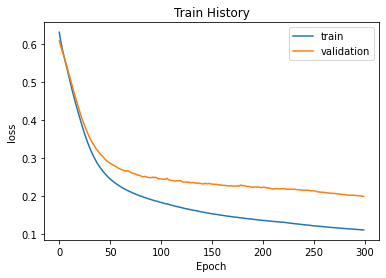

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history1,'loss','val_loss')

In [ ]:
ydi_pred = dmodel.predict(Xd_test)


rounded = [round(x[0]) for x in ydi_pred]
ydi_pred = rounded

from sklearn.metrics import accuracy_score
score_d = round(accuracy_score(ydi_pred,yd_test)*100,2)

print("The accuracy score of the initial model on the Test set is: "+str(score_d)+" %")

The accuracy score of the initial model on the Test set is: 94.23 %


## First Optimized Model

In [ ]:
from keras.optimizers import SGD
diab_model = Sequential()
diab_model.add(Dense(units=15, input_dim=8, kernel_initializer='uniform', activation='relu'))
diab_model.add(Dropout(0.3))
diab_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
diab_model.add(Dropout(0.2))
diab_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(diab_model.summary())
opt = SGD(lr=0.03, momentum=0.9)
diab_model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                135       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history = diab_model.fit(x=Xd_train, y = yd_train, validation_split=0.2, epochs=200, batch_size=5, verbose=2)

Epoch 1/200
67/67 - 1s - loss: 0.6781 - accuracy: 0.5994 - val_loss: 0.6637 - val_accuracy: 0.6310
Epoch 2/200
67/67 - 0s - loss: 0.6753 - accuracy: 0.6084 - val_loss: 0.6620 - val_accuracy: 0.6310
Epoch 3/200
67/67 - 0s - loss: 0.6734 - accuracy: 0.6084 - val_loss: 0.6594 - val_accuracy: 0.6310
Epoch 4/200
67/67 - 0s - loss: 0.6704 - accuracy: 0.6084 - val_loss: 0.6828 - val_accuracy: 0.6310
Epoch 5/200
67/67 - 0s - loss: 0.6574 - accuracy: 0.6084 - val_loss: 0.5723 - val_accuracy: 0.6310
Epoch 6/200
67/67 - 0s - loss: 0.4376 - accuracy: 0.7741 - val_loss: 0.2889 - val_accuracy: 0.9048
Epoch 7/200
67/67 - 0s - loss: 0.3401 - accuracy: 0.8554 - val_loss: 0.2799 - val_accuracy: 0.8929
Epoch 8/200
67/67 - 0s - loss: 0.3296 - accuracy: 0.8795 - val_loss: 0.2564 - val_accuracy: 0.9048
Epoch 9/200
67/67 - 0s - loss: 0.3012 - accuracy: 0.8765 - val_loss: 0.3450 - val_accuracy: 0.9048
Epoch 10/200
67/67 - 0s - loss: 0.3363 - accuracy: 0.8524 - val_loss: 0.2985 - val_accuracy: 0.9167
Epoch 11/

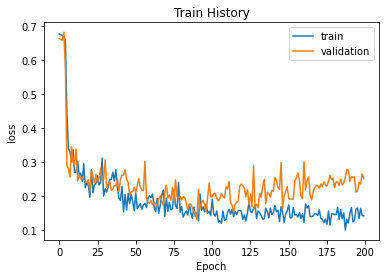

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history,'loss','val_loss')

In [ ]:
yd_pred = diab_model.predict(Xd_test)


rounded = [round(x[0]) for x in yd_pred]
yd_pred = rounded

from sklearn.metrics import accuracy_score
score_dd = round(accuracy_score(yd_pred,yd_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_dd)+" %")

The accuracy score of the optimized model on the Test set is: 94.23 %


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[36  3]
 [ 3 62]]


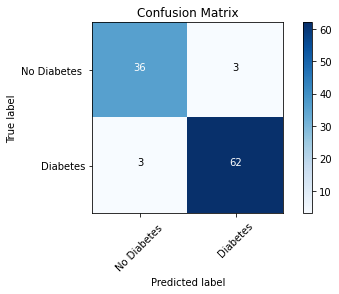

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=yd_test, y_pred=yd_pred)
cm_plot_labels = ['No Diabetes ','Diabetes']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Second Optimization

In [ ]:
from keras.optimizers import SGD
diab2_model = Sequential()
diab2_model.add(Dense(units=5, input_dim=8, kernel_initializer='uniform', activation='relu'))
diab2_model.add(Dropout(0.2))
diab2_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
diab2_model.add(Dropout(0.1))
diab2_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(diab2_model.summary())
opt = SGD(lr=0.03, momentum=0.9)
diab2_model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 18        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history2 = diab2_model.fit(x=Xd_train, y = yd_train, validation_split=0.2,shuffle=True, epochs=300, batch_size=5, verbose=2)

Epoch 1/300
67/67 - 1s - loss: 0.6781 - accuracy: 0.6054 - val_loss: 0.6637 - val_accuracy: 0.6310
Epoch 2/300
67/67 - 0s - loss: 0.6753 - accuracy: 0.6084 - val_loss: 0.6621 - val_accuracy: 0.6310
Epoch 3/300
67/67 - 0s - loss: 0.6736 - accuracy: 0.6084 - val_loss: 0.6598 - val_accuracy: 0.6310
Epoch 4/300
67/67 - 0s - loss: 0.6713 - accuracy: 0.6084 - val_loss: 0.6855 - val_accuracy: 0.6310
Epoch 5/300
67/67 - 0s - loss: 0.6760 - accuracy: 0.6084 - val_loss: 0.6589 - val_accuracy: 0.6310
Epoch 6/300
67/67 - 0s - loss: 0.6711 - accuracy: 0.6084 - val_loss: 0.6541 - val_accuracy: 0.6310
Epoch 7/300
67/67 - 0s - loss: 0.6287 - accuracy: 0.6687 - val_loss: 0.4989 - val_accuracy: 0.9286
Epoch 8/300
67/67 - 0s - loss: 0.3686 - accuracy: 0.8494 - val_loss: 0.2647 - val_accuracy: 0.9167
Epoch 9/300
67/67 - 0s - loss: 0.3762 - accuracy: 0.8313 - val_loss: 0.3566 - val_accuracy: 0.8810
Epoch 10/300
67/67 - 0s - loss: 0.3525 - accuracy: 0.8283 - val_loss: 0.2640 - val_accuracy: 0.9167
Epoch 11/

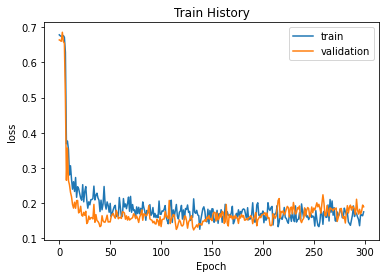

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history2,'loss','val_loss')

In [ ]:
yd_pred2 = diab2_model.predict(Xd_test)


rounded = [round(x[0]) for x in yd_pred2]
yd_pred2 = rounded

from sklearn.metrics import accuracy_score
score_d2 = round(accuracy_score(yd_pred2,yd_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_d2)+" %")

The accuracy score of the optimized model on the Test set is: 92.31 %


## Heart Disease Prediction

In [ ]:
heart = pd.read_csv('/content/drive/My Drive/disease-data//heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
def null_proportion(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df
    

### Preprocessing Heart Disease Data

In [ ]:
null_proportion(heart)

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
cp,cp,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0


In [ ]:
Yher = heart['target']
Xher = heart.drop(['target'], axis = 1)

Feature Importances :  [0.02468059 0.1104956  0.22259757 0.24462892 0.05272717 0.03362136
 0.0257689  0.02738756 0.03067236 0.02826071 0.05165935 0.02664803
 0.03390522 0.0117486  0.05558585 0.01961219]


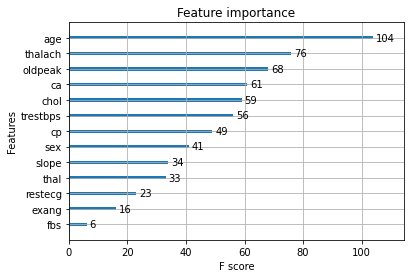

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
# fit model to training data
xgb = XGBClassifier(random_state = 0 )
xgb.fit(Xher, Yher)
print("Feature Importances : ", xgb_model.feature_importances_)
# plot feature importance
plot_importance(xgb)
plt.show()

In [ ]:
print(heart.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


###  Creating a new heart disease dataframe with the first 8 features that are highly correlated to the target

In [ ]:
heart_df = heart[['age' ,'thalach' ,'oldpeak', 'ca' ,'chol','trestbps','cp','sex','target']]
heart_df.head()

,age,thalach,oldpeak,ca,chol,trestbps,cp,sex,target
0,63,150,2.3,0,233,145,3,1,1
1,37,187,3.5,0,250,130,2,1,1
2,41,172,1.4,0,204,130,1,0,1
3,56,178,0.8,0,236,120,1,1,1
4,57,163,0.6,0,354,120,0,0,1


### Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
# Funtion for normalizing data
def normalizeData(X, Y):
    Y = normalizer.fit_transform(Y)
    X = normalizer.fit_transform(X)

In [ ]:
heart_df.head()

,age,thalach,oldpeak,ca,chol,trestbps,cp,sex,target
0,63,150,2.3,0,233,145,3,1,1
1,37,187,3.5,0,250,130,2,1,1
2,41,172,1.4,0,204,130,1,0,1
3,56,178,0.8,0,236,120,1,1,1
4,57,163,0.6,0,354,120,0,0,1


### Split and Normalize data

In [ ]:
# split data into X and Y train
Yh = heart_df[['target']]
Xh = heart_df.drop(['target'],axis=1)
normalizeData(Xh, Yh)

In [ ]:
Xh.head()

,age,thalach,oldpeak,ca,chol,trestbps,cp,sex
0,63,150,2.3,0,233,145,3,1
1,37,187,3.5,0,250,130,2,1
2,41,172,1.4,0,204,130,1,0
3,56,178,0.8,0,236,120,1,1
4,57,163,0.6,0,354,120,0,0


In [ ]:
# Split data into train and test
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, Yh, test_size=0.2, random_state=43)

Initial Model Without Optimization

In [ ]:
hmodel = Sequential()
hmodel.add(Dense(5,activation='relu',input_dim=8))
hmodel.add(Dense(1,activation='sigmoid'))
print(hmodel.summary())
hmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history1 = hmodel.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
8/8 - 1s - loss: 10.8033 - accuracy: 0.5544 - val_loss: 11.5669 - val_accuracy: 0.5102
Epoch 2/300
8/8 - 0s - loss: 9.8979 - accuracy: 0.5544 - val_loss: 10.5408 - val_accuracy: 0.5102
Epoch 3/300
8/8 - 0s - loss: 9.0230 - accuracy: 0.5544 - val_loss: 9.5841 - val_accuracy: 0.5102
Epoch 4/300
8/8 - 0s - loss: 8.2243 - accuracy: 0.5544 - val_loss: 8.7065 - val_accuracy: 0.5102
Epoch 5/300
8/8 - 0s - loss: 7.4674 - accuracy: 0.5544 - val_loss: 7.8991 - val_accuracy: 0.5102
Epoch 6/300
8/8 - 0s - loss: 6.7563 - accuracy: 0.5544 - val_loss: 7.1788 - val_accuracy: 0.5102
Epoch 7/300
8/8 - 0s - loss: 6.1079 - accuracy: 0.5544 - val_loss: 6.5160 - val_accuracy: 0.5102
Epoch 8/300
8/8 - 0s - loss: 5.5274 - accuracy: 0.5544 - val_loss: 5.8846 - val_accuracy: 0.5102
Epoch 9/300
8/8 - 0s - loss: 4.9588 - accuracy: 0.5544 - val_loss: 5.3126 - val_accuracy: 0.5102
Epoch 10/300
8/8 - 0s - loss: 4.4638 - accuracy: 0.5544 - val_loss: 4.7662 - val_accuracy: 0.5102
Epoch 11/300
8/8 - 0s - lo

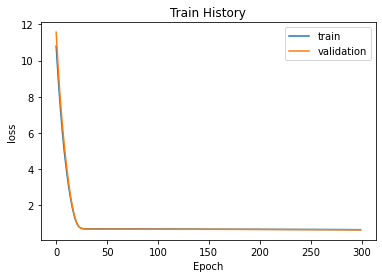

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history1,'loss','val_loss')

In [ ]:
yhi_pred = hmodel.predict(Xh_test)


rounded = [round(x[0]) for x in yhi_pred]
yhi_pred = rounded

from sklearn.metrics import accuracy_score
score_h = round(accuracy_score(yhi_pred,yh_test)*100,2)

print("The accuracy score of the initial model on the Test set is: "+str(score_h)+" %")

The accuracy score of the initial model on the Test set is: 70.49 %


# First Optimized Model

In [ ]:
heart_model = Sequential()
heart_model.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))
heart_model.add(Dropout(0.4))
heart_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
heart_model.add(Dropout(0.4))
heart_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(heart_model.summary())
heart_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
_________________________________________________________________
dropout_5 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history = heart_model.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
8/8 - 1s - loss: 0.6921 - accuracy: 0.5648 - val_loss: 0.6920 - val_accuracy: 0.5102
Epoch 2/300
8/8 - 0s - loss: 0.6933 - accuracy: 0.5544 - val_loss: 0.6920 - val_accuracy: 0.5102
Epoch 3/300
8/8 - 0s - loss: 0.6905 - accuracy: 0.5544 - val_loss: 0.6919 - val_accuracy: 0.5102
Epoch 4/300
8/8 - 0s - loss: 0.6878 - accuracy: 0.5544 - val_loss: 0.6916 - val_accuracy: 0.5102
Epoch 5/300
8/8 - 0s - loss: 0.6920 - accuracy: 0.5544 - val_loss: 0.6914 - val_accuracy: 0.5102
Epoch 6/300
8/8 - 0s - loss: 0.6891 - accuracy: 0.5544 - val_loss: 0.6913 - val_accuracy: 0.5102
Epoch 7/300
8/8 - 0s - loss: 0.6906 - accuracy: 0.5544 - val_loss: 0.6910 - val_accuracy: 0.5102
Epoch 8/300
8/8 - 0s - loss: 0.6879 - accuracy: 0.5544 - val_loss: 0.6909 - val_accuracy: 0.5102
Epoch 9/300
8/8 - 0s - loss: 0.6810 - accuracy: 0.5544 - val_loss: 0.6908 - val_accuracy: 0.5102
Epoch 10/300
8/8 - 0s - loss: 0.6866 - accuracy: 0.5544 - val_loss: 0.6907 - val_accuracy: 0.5102
Epoch 11/300
8/8 - 0s - loss:

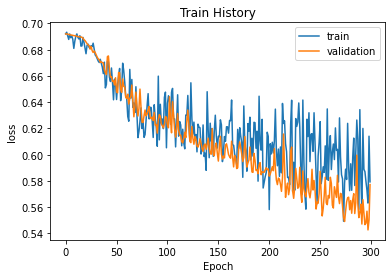

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history,'loss','val_loss')


In [ ]:
yh_pred = heart_model.predict(Xh_test)


rounded = [round(x[0]) for x in yh_pred]
yh_pred = rounded

from sklearn.metrics import accuracy_score
score_nn = round(accuracy_score(yh_pred,yh_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_nn)+" %")

The accuracy score of the optimized model on the Test set is: 88.52 %


Confusion matrix, without normalization
[[26  2]
 [ 5 28]]


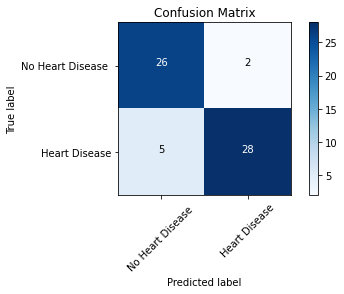

In [ ]:
cm = confusion_matrix(y_true=yh_test, y_pred=yh_pred)
cm_plot_labels = ['No Heart Disease ','Heart Disease']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Second Optimized Model

In [ ]:
heart_model2 = Sequential()
heart_model2.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))
# heart_model2.add(Dropout(0.4))
heart_model2.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
# heart_model2.add(Dropout(0.5))
heart_model2.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(heart_model2.summary())
opt = SGD(lr=0.03, momentum=0.9)
heart_model2.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history3 = heart_model2.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=100, batch_size=15, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 0.6928 - accuracy: 0.5544 - val_loss: 0.6923 - val_accuracy: 0.5102
Epoch 2/100
13/13 - 0s - loss: 0.6893 - accuracy: 0.5544 - val_loss: 0.6928 - val_accuracy: 0.5102
Epoch 3/100
13/13 - 0s - loss: 0.6852 - accuracy: 0.5544 - val_loss: 0.6969 - val_accuracy: 0.5102
Epoch 4/100
13/13 - 0s - loss: 0.6847 - accuracy: 0.5544 - val_loss: 0.6908 - val_accuracy: 0.5102
Epoch 5/100
13/13 - 0s - loss: 0.6883 - accuracy: 0.5440 - val_loss: 0.7257 - val_accuracy: 0.5102
Epoch 6/100
13/13 - 0s - loss: 0.6958 - accuracy: 0.5544 - val_loss: 0.6951 - val_accuracy: 0.5102
Epoch 7/100
13/13 - 0s - loss: 0.6877 - accuracy: 0.5544 - val_loss: 0.6963 - val_accuracy: 0.5102
Epoch 8/100
13/13 - 0s - loss: 0.6878 - accuracy: 0.5544 - val_loss: 0.6955 - val_accuracy: 0.5102
Epoch 9/100
13/13 - 0s - loss: 0.6880 - accuracy: 0.5544 - val_loss: 0.6982 - val_accuracy: 0.5102
Epoch 10/100
13/13 - 0s - loss: 0.6876 - accuracy: 0.5544 - val_loss: 0.6974 - val_accuracy: 0.5102
Epoch 11/

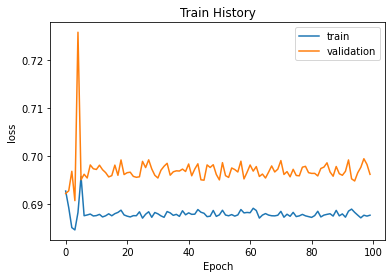

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history3,'loss','val_loss')


In [ ]:
yh_pred2 = heart_model2.predict(Xh_test)


rounded = [round(x[0]) for x in yh_pred2]
yh_pred2 = rounded

from sklearn.metrics import accuracy_score
score_h2 = round(accuracy_score(yh_pred2,yh_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_h2)+" %")

The accuracy score of the optimized model on the Test set is: 54.1 %


Confusion matrix, without normalization
[[ 0 28]
 [ 0 33]]


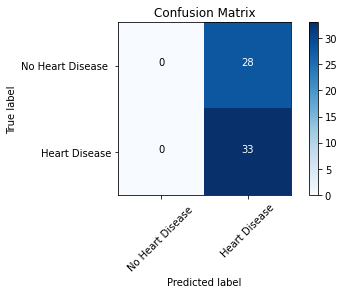

In [ ]:
cm = confusion_matrix(y_true=yh_test, y_pred=yh_pred2)
cm_plot_labels = ['No Heart Disease ','Heart Disease']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
heart_model.save('heart_prediction_model.h5')
diab_model.save('diab_prediction_model.h5')

Download Models

In [ ]:
# from google.colab import files
# files.download("diab_prediction_model.h5")
# files.download("heart_prediction_model.h5")

In [ ]:
# from keras.models import load_model